# NEURAL NETWORKS ASSIGNMENT

**Purpose:** The objective of this assignment is to get hands-on experience with Neural Networks. 

**Preparation: **To complete this assignment, you will need.		
Have a working version of Python 3.5 or above
Listen/read the lectures and understand neural networks
A plotting library in Python (e.g. Matplotlib, ggplot or Seaborn)

**What to submit: **Your submission should be this single Python notebook. Each question should be in a separate code block, in sequential order and with proper headings and documentation to know which question corresponds to which code solution. 

# **For this homework, you will implement a two-layer neural network (i.e. one hidden layer).** 


In [76]:
#ALL THE IMPORTS

#from google.colab import drive
#drive.mount("/content/drive/")

#!ls "/content/drive/My Drive"

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

# Function to transform target values of output layer
def set_target(outputlayer):
    row_maxes = outputlayer.max(axis=1).reshape(-1, 1)
    outputlayer = np.where(outputlayer == row_maxes, .9, .1)
    return outputlayer 

# Function to plot accuracy vs epoch graph
# help function given to you if you would like to use it.
def plot_accgraph(evaluation, n):
    fig = plt.figure(figsize=(8,5))
    plt.subplot(2,1,1)
    plt.plot(evaluation.history['accuracy'])
    plt.plot(evaluation.history['val_accuracy'])
    plt.title('Accuracy vs Epochs with hidden units = ' +str(n) )
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'test'], loc='lower right')


In [ ]:
#pip install tensorflow

#Data

For this assignment, we will develop a neural network to perform handwritten digit recognition task using the Semeion digit dataset. This digit archive is available here: https://archive.ics.uci.edu/ml/datasets/Semeion+Handwritten+Digit


---



In [77]:

#YOUR CODE TO LOAD THE DATA GOES HERE

data=pd.read_csv('semeion.data',header=None, delimiter=r"\s+")


In [78]:
data

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1589,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1590,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1591,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
# THE CODE TO CREATE X AND Y IS ALREADY GIVEN HERE
#Delineate our image samples (features)
X = data.iloc[:,:-10]
print(X.shape)
X

(1593, 256)


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1589,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1590,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1591,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# Convert to array 
X = np.asarray(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
# Delineate labels
y = data.iloc[:,-10:]
print(y.shape)
y

(1593, 10)


,256,257,258,259,260,261,262,263,264,265
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1588,0,0,0,0,0,0,0,0,0,1
1589,0,0,0,0,0,0,0,0,0,1
1590,0,0,0,0,0,0,0,0,0,1
1591,0,0,0,0,0,0,0,0,0,1


In [82]:
# Convert to array
y = np.asarray(y)
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [83]:
# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [84]:
# Number of features in our training set, confirmed
X_train.shape[1]

256


# ALL QUESTIONS BELOW ARE BASED ON THE FOLLOWING NEURAL NETWORK STRUCTURE

**Neural Network structure:** Your NN (neural network) will have one hidden layer with n hidden units (n should be a parameter of your program function) and 10 output units. The network should be fully connected. 

**Activation function:** Hidden and output units should use the sigmoid activation function. 

**Bias unit:** Every hidden and output unit should have a weighted connection from bias unit, whose value should be set to 1. 

**Output:** The output units should correspond to one of 10 classes (1 to 9). Set the target value tk for output unit k to 0.9 if input class is the kth class, 0.1 otherwise. <-- THIS HAS ALREADY BEEN DONE FOR YOU ABOVE

**Training:** Use backpropagation with SGD to train the network. Set the learning rate to 0.1. 



**Question 1:** Experiment with varying the number of hidden units. (Each subquestion below is worth 2 points = 10 points total) 

***1a.*** Conduct experiments with n = 20, 50 and 100. (Hint: remember to include bias unit weights). Train your network for 50 epochs. After each epoch, record your accuracy on training set AND test set for your network. After training is complete, create a confusion matrix for each of your trained networks, summarizing results on the test set. 

***1b.*** Give a plot of both training and test accuracy as a function of epoch number (graph both of these on sample plot). 


***1c.*** Discuss your results in at least 50 words: How does the number of hidden units affect the final accuracy on the test data? 

***1d.*** Discuss your results in at least 50 words: How does the number of hidden units affect the number of epochs needed for training to converge? 

***1e.*** Discuss your results in at least 50 words: Is there any evidence that any of your networks overfit to the training data? If so, what is the evidence?


### Intializing Neural Network

In [98]:
# Train the neural net

#YOUR CODE GOES HERE

bias_initializer=tf.keras.initializers.Ones()
nn=tf.keras.models.Sequential()


### Input Layer and Hidden Layer

In [99]:
nn.add(tf.keras.layers.Dense(units=20, activation='sigmoid',use_bias=True,bias_initializer=bias_initializer))


### Output Layer

In [100]:

nn.add(tf.keras.layers.Dense(units=10, activation='sigmoid',use_bias=True,bias_initializer=bias_initializer))


### Training the Network

In [ ]:
#X_train50, X_test50, y_train50, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [101]:
optimizer=keras.optimizers.SGD(lr=0.1)


In [102]:
nn.compile(optimizer = optimizer,loss = 'categorical_crossentropy', metrics = ['accuracy'])

#keras.metrics.Precision(), keras.metrics.Recall(),keras.metrics.Accuracy()

In [103]:
evaluation=nn.fit(X_train, y_train, batch_size = 30,validation_split = 0.1, epochs = 50)

Epoch 1/50
34/34 [==============================] - 1s 11ms/step - loss: 2.4303 - accuracy: 0.1389 - val_loss: 2.1451 - val_accuracy: 0.3482
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 2.1066 - accuracy: 0.3472 - val_loss: 1.9606 - val_accuracy: 0.5357
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 1.9235 - accuracy: 0.5328 - val_loss: 1.7545 - val_accuracy: 0.6429
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 1.7387 - accuracy: 0.6554 - val_loss: 1.5780 - val_accuracy: 0.7768
Epoch 5/50
34/34 [==============================] - 0s 4ms/step - loss: 1.5404 - accuracy: 0.7930 - val_loss: 1.4067 - val_accuracy: 0.8214
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 1.3499 - accuracy: 0.8197 - val_loss: 1.2498 - val_accuracy: 0.8304
Epoch 7/50
34/34 [==============================] - 0s 3ms/step - loss: 1.1894 - accuracy: 0.8456 - val_loss: 1.1393 - val_accuracy: 0.8482
Epoch 8/50
34/34 [=

In [104]:
y_pred=nn.predict_classes(X_test)

In [105]:
y_pred

array([1, 5, 8, 6, 1, 8, 6, 8, 8, 6, 1, 6, 6, 9, 5, 0, 8, 1, 9, 4, 6, 2,
       8, 3, 0, 2, 8, 9, 0, 1, 2, 8, 6, 9, 1, 2, 4, 1, 7, 2, 7, 8, 8, 7,
       6, 0, 6, 1, 0, 3, 3, 8, 4, 4, 1, 0, 1, 9, 0, 6, 4, 0, 9, 5, 7, 0,
       6, 8, 7, 2, 2, 7, 7, 8, 1, 3, 2, 5, 9, 7, 1, 6, 6, 8, 9, 1, 8, 5,
       3, 8, 5, 8, 6, 7, 6, 7, 9, 2, 4, 3, 9, 0, 6, 2, 7, 4, 4, 0, 2, 1,
       6, 9, 8, 1, 3, 2, 0, 9, 7, 7, 3, 0, 0, 6, 6, 5, 4, 0, 5, 6, 8, 8,
       1, 1, 3, 4, 9, 3, 9, 3, 4, 8, 2, 2, 4, 3, 1, 6, 2, 7, 3, 2, 1, 2,
       8, 3, 0, 4, 8, 1, 8, 1, 4, 8, 2, 1, 3, 4, 3, 6, 1, 9, 4, 8, 7, 9,
       9, 4, 5, 0, 1, 5, 6, 2, 5, 8, 6, 9, 1, 5, 7, 1, 6, 1, 5, 6, 0, 5,
       1, 5, 8, 5, 5, 7, 1, 5, 7, 9, 3, 3, 4, 0, 7, 5, 9, 8, 7, 3, 2, 0,
       1, 2, 9, 2, 9, 7, 8, 7, 9, 7, 2, 3, 1, 1, 8, 6, 6, 6, 9, 9, 1, 8,
       8, 6, 7, 4, 4, 8, 0, 4, 3, 3, 2, 8, 9, 5, 8, 5, 3, 9, 3, 5, 4, 1,
       1, 6, 1, 4, 9, 6, 9, 0, 5, 6, 5, 8, 6, 8, 4, 9, 6, 7, 5, 0, 1, 2,
       4, 4, 4, 2, 5, 5, 6, 8, 1, 4, 9, 6, 8, 1, 0,

In [106]:
# evaluate the model
_, train_acc = nn.evaluate(X_train, y_train)
_, test_acc = nn.evaluate(X_test,y_test )


15/15 [==============================] - 0s 997us/step - loss: 0.3199 - accuracy: 0.9100


In [107]:
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' %  test_acc)

Train Accuracy: 0.983
Test Accuracy: 0.910


In [108]:

#import tensorflow from keras.utils import to_categorical
#test_pred=to_categorical(y_pred)
#y_pred

y_pred1=tf.keras.utils.to_categorical(y_pred)


In [66]:
y_pred1.shape

#y_pred1 = y_pred1.astype(np.int32)

(478, 10)

In [59]:
y_test.shape

(478, 10)

In [109]:
# Calculate accuracy, precision and recall using metrics package on the test set
#YOUR CODE GOES HERE -- YOU MAY GET A DIFFERENT ACCURACY AND PRECISION/RECALL
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred1)
print('Accuracy: %.3f' % accuracy)
print(metrics.classification_report(y_test,y_pred1))


Accuracy: 0.910
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        49
           1       0.89      0.93      0.91        58
           2       0.89      0.89      0.89        38
           3       0.85      0.90      0.87        50
           4       0.90      0.93      0.91        40
           5       0.98      0.91      0.94        45
           6       0.93      0.98      0.95        53
           7       0.92      0.87      0.89        38
           8       0.94      0.93      0.94        55
           9       0.85      0.79      0.82        52

   micro avg       0.91      0.91      0.91       478
   macro avg       0.91      0.91      0.91       478
weighted avg       0.91      0.91      0.91       478
 samples avg       0.91      0.91      0.91       478



In [110]:
mat=tf.math.confusion_matrix(labels=y_test.argmax(axis=1),predictions=y_pred1.argmax(axis=1)).numpy()


In [111]:
classes=[0,1,2,3,4,5,6,7,8,9]
mat = np.around(mat.astype('float') / mat.sum(axis=1)[:, np.newaxis], decimals=2)

mat_df = pd.DataFrame(mat,
                     index = classes, 
                     columns = classes)

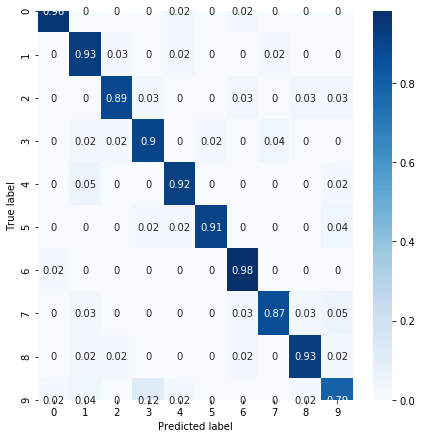

In [112]:
figure = plt.figure(figsize=(6, 6))
sns.heatmap(mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [52]:
#y_pred1
#y_pred1 = y_pred1.astype({'a': np.int64})
#y_pred1.dtypes
y_pred1

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
y_test

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

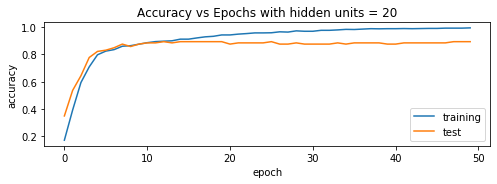

In [113]:
# Function to plot accuracy vs epoch graph
# help function given to you if you would like to use it.

plot_accgraph(evaluation,20)

<h1> REPEAT WITH Training with 50 hidden units </h1>

In [116]:
nn50=tf.keras.models.Sequential()

nn50.add(tf.keras.layers.Dense(units=50, activation='sigmoid',use_bias=True,bias_initializer=bias_initializer))
nn50.add(tf.keras.layers.Dense(units=10, activation='sigmoid',use_bias=True,bias_initializer=bias_initializer))
#optimizer=keras.optimizers.SGD(lr=0.1)
nn50.compile(optimizer = optimizer,loss = 'categorical_crossentropy', metrics = ['accuracy'])
nn50.fit(X_train, y_train, batch_size = 30,validation_split = 0.1, epochs = 50)

Epoch 1/50
34/34 [==============================] - 1s 7ms/step - loss: 2.3659 - accuracy: 0.1128 - val_loss: 2.0841 - val_accuracy: 0.3750
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: 2.0466 - accuracy: 0.4033 - val_loss: 1.8419 - val_accuracy: 0.4821
Epoch 3/50
34/34 [==============================] - 0s 4ms/step - loss: 1.7710 - accuracy: 0.6377 - val_loss: 1.5674 - val_accuracy: 0.6875
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 1.5031 - accuracy: 0.7411 - val_loss: 1.3411 - val_accuracy: 0.8036
Epoch 5/50
34/34 [==============================] - 0s 3ms/step - loss: 1.2730 - accuracy: 0.8132 - val_loss: 1.1348 - val_accuracy: 0.8661
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 1.0854 - accuracy: 0.8251 - val_loss: 1.0067 - val_accuracy: 0.8214
Epoch 7/50
34/34 [==============================] - 0s 7ms/step - loss: 0.9330 - accuracy: 0.8467 - val_loss: 0.8889 - val_accuracy: 0.8750
Epoch 8/50
34/34 [==

In [117]:
y_pred50=nn50.predict_classes(X_test)

In [118]:
# evaluate the model
_, train_acc = nn50.evaluate(X_train, y_train)
_, test_acc = nn50.evaluate(X_test,y_test )

15/15 [==============================] - 0s 997us/step - loss: 0.3029 - accuracy: 0.8996


In [119]:
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' %  test_acc)

Train Accuracy: 0.987
Test Accuracy: 0.900


In [120]:
y_pred1=tf.keras.utils.to_categorical(y_pred)
# Calculate accuracy, precision and recall using metrics package on the test set
#YOUR CODE GOES HERE -- YOU MAY GET A DIFFERENT ACCURACY AND PRECISION/RECALL
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred1)
print('Accuracy: %.3f' % accuracy)
print(metrics.classification_report(y_test,y_pred1))

Accuracy: 0.910
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        49
           1       0.89      0.93      0.91        58
           2       0.89      0.89      0.89        38
           3       0.85      0.90      0.87        50
           4       0.90      0.93      0.91        40
           5       0.98      0.91      0.94        45
           6       0.93      0.98      0.95        53
           7       0.92      0.87      0.89        38
           8       0.94      0.93      0.94        55
           9       0.85      0.79      0.82        52

   micro avg       0.91      0.91      0.91       478
   macro avg       0.91      0.91      0.91       478
weighted avg       0.91      0.91      0.91       478
 samples avg       0.91      0.91      0.91       478



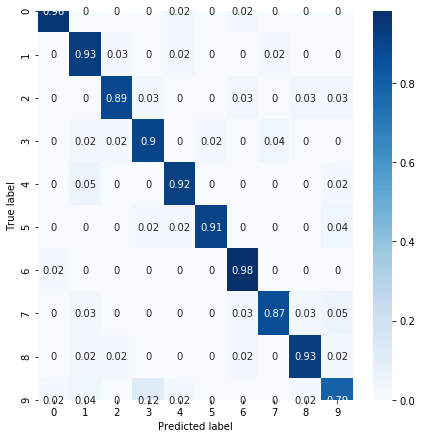

In [121]:
mat=tf.math.confusion_matrix(labels=y_test.argmax(axis=1),predictions=y_pred1.argmax(axis=1)).numpy()
classes=[0,1,2,3,4,5,6,7,8,9]
mat = np.around(mat.astype('float') / mat.sum(axis=1)[:, np.newaxis], decimals=2)

mat_df = pd.DataFrame(mat,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(6, 6))
sns.heatmap(mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

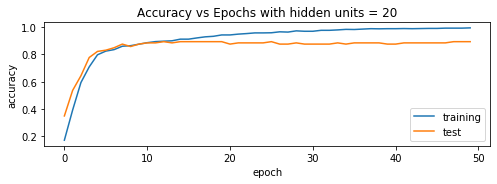

In [122]:
plot_accgraph(evaluation,20)

<h1> REPEAT WITH Training with 100 hidden units </h1>

In [123]:
nn100=tf.keras.models.Sequential()

nn100.add(tf.keras.layers.Dense(units=100, activation='sigmoid',use_bias=True,bias_initializer=bias_initializer))
nn100.add(tf.keras.layers.Dense(units=10, activation='sigmoid',use_bias=True,bias_initializer=bias_initializer))
#optimizer=keras.optimizers.SGD(lr=0.1)
nn100.compile(optimizer = optimizer,loss = 'categorical_crossentropy', metrics = ['accuracy'])
nn100.fit(X_train, y_train, batch_size = 9,validation_split = 0.1, epochs = 50)

Epoch 1/50
112/112 [==============================] - 1s 3ms/step - loss: 2.2695 - accuracy: 0.1829 - val_loss: 1.6648 - val_accuracy: 0.2679
Epoch 2/50
112/112 [==============================] - 0s 3ms/step - loss: 1.2416 - accuracy: 0.6779 - val_loss: 0.8952 - val_accuracy: 0.7589
Epoch 3/50
112/112 [==============================] - 0s 2ms/step - loss: 0.7228 - accuracy: 0.8484 - val_loss: 0.5980 - val_accuracy: 0.8393
Epoch 4/50
112/112 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8820 - val_loss: 0.4618 - val_accuracy: 0.9286
Epoch 5/50
112/112 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.9254 - val_loss: 0.4100 - val_accuracy: 0.9107
Epoch 6/50
112/112 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.9382 - val_loss: 0.3628 - val_accuracy: 0.9107
Epoch 7/50
112/112 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.9480 - val_loss: 0.3431 - val_accuracy: 0.9286
Epoch 

In [124]:
y_pred100=nn100.predict_classes(X_test)

In [125]:
# evaluate the model
_, train_acc = nn50.evaluate(X_train, y_train)
_, test_acc = nn50.evaluate(X_test,y_test )

15/15 [==============================] - 0s 926us/step - loss: 0.3029 - accuracy: 0.8996


In [126]:
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' %  test_acc)

Train Accuracy: 0.987
Test Accuracy: 0.900


In [127]:
y_pred1=tf.keras.utils.to_categorical(y_pred)
# Calculate accuracy, precision and recall using metrics package on the test set
#YOUR CODE GOES HERE -- YOU MAY GET A DIFFERENT ACCURACY AND PRECISION/RECALL
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred1)
print('Accuracy: %.3f' % accuracy)
print(metrics.classification_report(y_test,y_pred1))

Accuracy: 0.910
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        49
           1       0.89      0.93      0.91        58
           2       0.89      0.89      0.89        38
           3       0.85      0.90      0.87        50
           4       0.90      0.93      0.91        40
           5       0.98      0.91      0.94        45
           6       0.93      0.98      0.95        53
           7       0.92      0.87      0.89        38
           8       0.94      0.93      0.94        55
           9       0.85      0.79      0.82        52

   micro avg       0.91      0.91      0.91       478
   macro avg       0.91      0.91      0.91       478
weighted avg       0.91      0.91      0.91       478
 samples avg       0.91      0.91      0.91       478



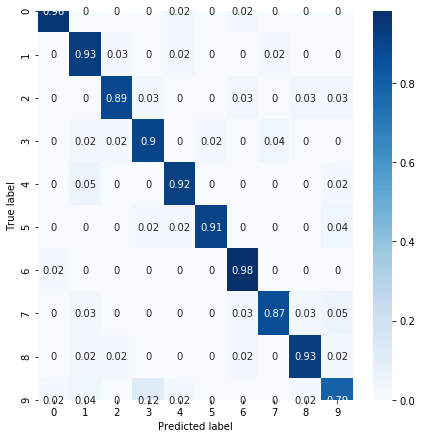

In [128]:
mat=tf.math.confusion_matrix(labels=y_test.argmax(axis=1),predictions=y_pred1.argmax(axis=1)).numpy()
classes=[0,1,2,3,4,5,6,7,8,9]
mat = np.around(mat.astype('float') / mat.sum(axis=1)[:, np.newaxis], decimals=2)

mat_df = pd.DataFrame(mat,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(6, 6))
sns.heatmap(mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

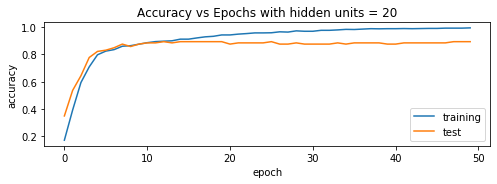

In [129]:
plot_accgraph(evaluation,20)

In [ ]:
For 20
Train Accuracy: 0.983
Test Accuracy: 0.910
    
for 50
Train Accuracy: 0.987
Test Accuracy: 0.900
    
For 100
Train Accuracy: 0.987
Test Accuracy: 0.900

<h3> Discuss your results in at least 50 words. How does number of hidden units affect the final accuracy on the test data? </h3>
    
There is not a significant difference if we compare all the three models with different hidden unit. We can see as we increase the number of hidden units , accuracy for the training dataset is almost set to 100%. Since we do not see much difference with the increase in the hidden unit, we can use another method like increasing the hidden layer, choosing different activation function, changing learning rate and so forth to see prominet difference.

<h3> Discuss your results in at least 50 words. How does number of hidden units affect number of epochs needed for training to converge?</h3>

If we compare all the three results we see that as we increase the number of units, the convergence is better. Loss is less for 100 hidden units as compared to 20. Another thing I noticed was as we increase the hidden unit, run time also increases. So we can say, more the hidden units, better the convergence

<h3> Discuss your results in at least 50 words: Is there any evidence that any of your networks overfit to the training data? If so, what is the evidence? </h3>

There is overfitting issues in the network, if we see the accuracy vs epoch plot there is difference between the the two line, More the difference, its a robust evidence that model has overfitting issues. 


# Extra Credit - increasing accuracy of best model 

Question 2 (Extra credit = 5 points total): Experiment with features and hyperparameters of the model to increase the accuracy of the best model from previous experiments. You should increase the accuracy by at least 10% to receive this extra credit. Document what changes you needed to make to achieve these results. 



In [252]:
optimizer=keras.optimizers.Adam(learning_rate=0.01)
bias_initializer=tf.keras.initializers.Ones()

In [253]:
#YOUR CODE GOES HERE IF ATTEMPTED

nnX=tf.keras.models.Sequential()

nnX.add(tf.keras.layers.Dense(units=100, activation='sigmoid',use_bias=True,bias_initializer=bias_initializer))
nnX.add(tf.keras.layers.Dense(units=100, activation='sigmoid',use_bias=True,bias_initializer=bias_initializer))
nnX.add(tf.keras.layers.Dense(units=10, activation='softmax',use_bias=True,bias_initializer=bias_initializer))
#optimizer=keras.optimizers.SGD(lr=0.1)
nnX.compile(optimizer = optimizer,loss = 'categorical_crossentropy', metrics = ['accuracy'])
nnX.fit(X_train, y_train, batch_size = 30, epochs = 170)

Epoch 1/170
38/38 [==============================] - 0s 2ms/step - loss: 2.1419 - accuracy: 0.2722
Epoch 2/170
38/38 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.8708
Epoch 3/170
38/38 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9471
Epoch 4/170
38/38 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9764
Epoch 5/170
38/38 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9984
Epoch 6/170
38/38 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9956
Epoch 7/170
38/38 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9989
Epoch 8/170
38/38 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 9/170
38/38 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 10/170
38/38 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 11/

In [254]:
y_predX=nnX.predict_classes(X_test)
# evaluate the model
_, train_acc = nnX.evaluate(X_train, y_train)
_, test_acc = nnX.evaluate(X_test,y_test )

print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' %  test_acc)

15/15 [==============================] - 0s 998us/step - loss: 0.4548 - accuracy: 0.9184
Train Accuracy: 1.000
Test Accuracy: 0.918


<h3> Document what changes you needed to make to achieve the results for extra credit. </h3>
I had to add extra layer. 
batch size fixed at 30
Optimizer: adam
output activation function: softmax